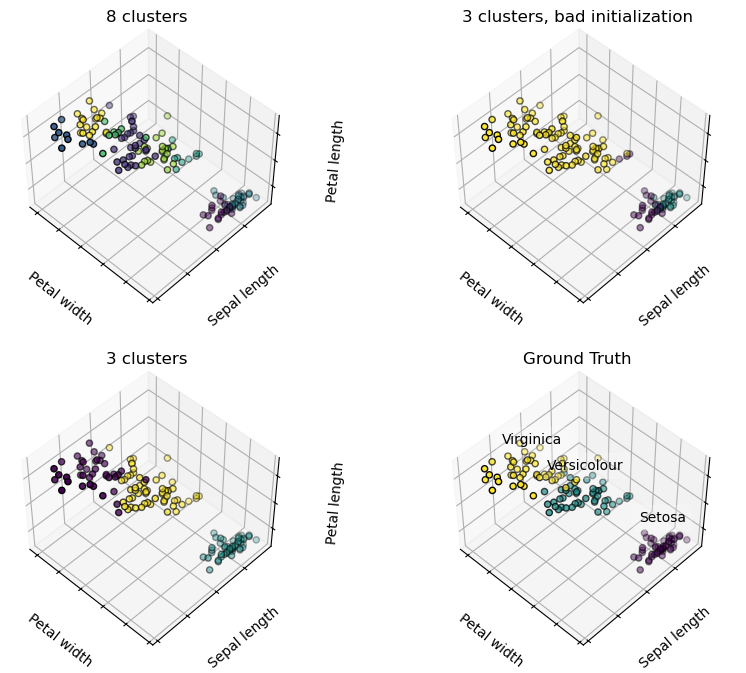

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
k_means_labels = None

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
    ("k_means_iris_3", KMeans(n_clusters=3)),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters, bad initialization", "3 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    k_means_labels = labels

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

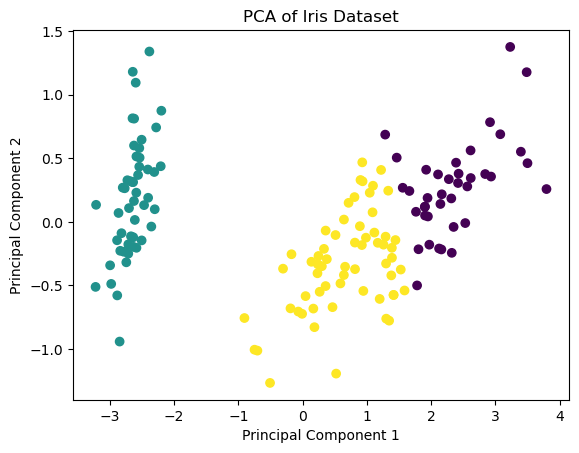

In [2]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced dataset
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


In [3]:
import pandas as pd

# Create DataFrame with cluster labels and species
df = pd.DataFrame({
    'cluster_labels': k_means_labels,
    'species': y
})

# Generate cross-tabulation
cross_tab = pd.crosstab(df['cluster_labels'], df['species'])


In [4]:
cross_tab

species,0,1,2
cluster_labels,,,
0,0,3,36
1,50,0,0
2,0,47,14


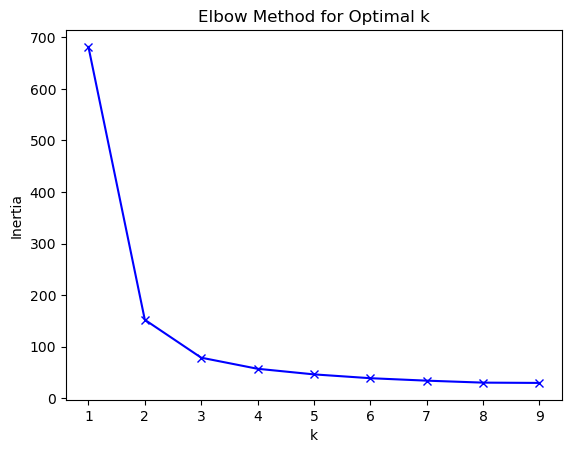

In [5]:
from sklearn.cluster import KMeans

# Calculate inertia for different k values
inertias = []
k_range = range(1, 10)
iris = datasets.load_iris()
X = iris.data
y = iris.target

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualize elbow curve
import matplotlib.pyplot as plt

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [6]:
df = pd.read_csv('../data/unsupervised_dataset/wine.csv')

In [7]:
df

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
X = df.loc[:, 'alcohol':]
y = df.loc[:, 'class_label']

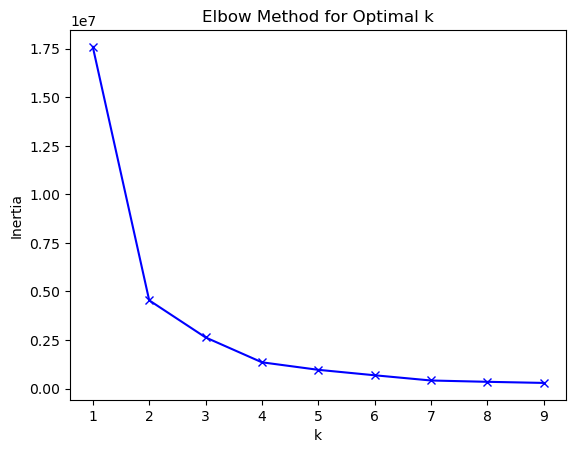

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
inertias = []
k_range = range(1, 10)
# Create and fit the scaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualize elbow curve
import matplotlib.pyplot as plt

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# # Apply KMeans to scaled data
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(X)

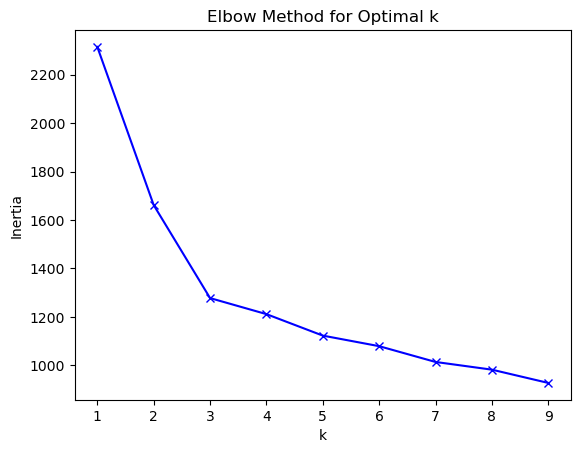

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 10)
# Create and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualize elbow curve
import matplotlib.pyplot as plt

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
# Apply KMeans to scaled data
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(X_scaled)